<a href="https://colab.research.google.com/github/aashu-0/learn-pytorch/blob/main/06_transfer_learning(ex).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Transfer Learning
Where to find pretrained models
1. Pytorch domain libraries
2. HF hub
3. `tim` (pytorch image library)
4. paperswithcode

### Setup
Installing the libraries

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 18.2 MB/s eta 0:00:00


In [2]:
import torch
import torchvision
torch.__version__, torch.__version__

('2.5.1+cu121', '2.5.1+cu121')

In [3]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# install torch info
try:
  from torchinfo import summary
except:
  print('[INFO] Installing torch.info...')
  !pip install torchinfo
  from torchinfo import summary


# import going_modular directory from github
try:
  from modualr_pytorch import data_setup, engine
except:
  print('[INFO] Downloading scripts from github...')
  !git clone https://github.com/aashu-0/learn-pytorch
  !mv learn-pytorch/modualr_pytorch .
  !rm -rf learn-pytorch
  from modualr_pytorch import data_setup, engine

[INFO] Installing torch.info...
[INFO] Downloading scripts from github...
Cloning into 'learn-pytorch'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 63 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 6.86 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [4]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Get Data and setup directories

In [5]:
from modualr_pytorch import get_data
# directories
train_dir = get_data.image_path/'train'
test_dir = get_data.image_path/'test'

data/pizza_steak_sushi does not exists...creating one
Downloading....the github zip file
Unzipping the zip file


In [6]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

### Creating Datasets and DataLoders
- we are going to use pretrained models from `torchvision.models`
- we need to apply a specific transform to prepare our images first
  * why? specific transform -> custom data going to the model should be in same format as that of training data

####Transforms can be done in two ways:
1. manual: using `transforms.Compose`
2. auto: using `weights.transforms()`

In [7]:
# manual transforms
manual_transforms = transforms.Compose([transforms.Resize((224,224)), #reshape all images
                                        transforms.ToTensor(), # turn image values b/w 0 &1
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])

In [8]:
# train and test dataloaders using data_setup
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloaders, test_dataloaders, class_names = data_setup.create_dataloaders(
                                                      train_dir=train_dir,
                                                      test_dir=test_dir,
                                                      transform= manual_transforms,
                                                      batch_size= BATCH_SIZE,
                                                      num_workers=NUM_WORKERS
)
train_dataloaders, test_dataloaders, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7fcd0c70f5e0>,
 ['pizza', 'steak', 'sushi'])

### Auto creation
To get weights form a pretrained model

`weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT`
where,
- `EfficientNet_B0_Weights` -> model architecture
- `DEFAULT` -> best available weights

In [9]:
#get a set of pretrained models
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [10]:
# get the transforms used in training of the model weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [11]:
# crerating dataloaders using auto_transform
train_dataloader, test_dataloaders, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform= auto_transforms,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)
train_dataloaders,test_dataloaders, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7fcd0c70f5e0>,
 ['pizza', 'steak', 'sushi'])

### Getting a pretrained model
various pretrained vision classification models
1. Resnets'
2. VGG
3. EfficientNets'
4. VisionTranformers(ViTs')
5. ConvNeXt
and much more

####Setup `EfficientNet_B0` model
`efficientnet_b0` model architecture
1. `features`
- lots of convolutional layers an dactivation funcions
- learns the different features of the images
2. `avgpool`
- take avg of output of features layer and turns into vector
3. `classifier`
- turns feature vector into a vector with dim = number of classes

In [12]:
#pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

#model
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 97.9MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [13]:
# get summary using torchinfo
summary(model=model,
        input_size=(32,3,224,224),
        #col_names= ['input_size'],
        col_names=['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

### Freezing the base model
in the process of transfer learning, we freeze same base layers and adjust the output layers as per our needs
- freezing means-> keeping the model pretrained weight/patterns as it is.
- so that we can then use these weights as backbone to train our model for specific task.

To freeze all the layers/params in the feature section -> `requires_grad= False`
- by setting this, pytorch doen't track the gradient updates and hence thes params won't be changed

In [14]:
# freeze
for parm in model.features.parameters():
  parm.requires_grad = False

In [15]:
# adjust the output layer as per our usecase

torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

# recreating the model classifier layer but keeping the dropout layer as droput
# helps to prevent our model from overfitting

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features= output_shape,
                    bias=True)
).to(device)

In [16]:
# let's see the summary
summary(model=model,
        input_size=(32,3,224,224),
        verbose=0,
        col_names =['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

###Train Model


In [17]:
import torchmetrics
# loss, optimizer and accuracy
loss_fn = torch.nn.CrossEntropyLoss()
accuracy_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)
optimizer = torch.optim.Adam(model.parameters(),
                             lr= 0.001)

In [18]:
# training the model using train() function in engine.py script

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# start the time
from timeit import default_timer as timer
start_time = timer()

# setup training
results = engine.train(model=model,
                       train_dataloader= train_dataloader,
                       test_dataloader=test_dataloaders,
                       optimizer= optimizer,
                       loss_fn= loss_fn,
                       accuracy_fn= accuracy_fn,
                       epochs= 5,
                       device = device
)

end_time = timer()
print(f"[INFO] Total Training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.0924 | Train acc: 0.3984 | Test Loss: 0.9133 | Test acc: 0.5398
Epoch: 1 | Train Loss: 0.8717 | Train acc: 0.7773 | Test Loss: 0.7912 | Test acc: 0.8153
Epoch: 2 | Train Loss: 0.7648 | Train acc: 0.7930 | Test Loss: 0.7463 | Test acc: 0.8561
Epoch: 3 | Train Loss: 0.7109 | Train acc: 0.7539 | Test Loss: 0.6373 | Test acc: 0.8655
Epoch: 4 | Train Loss: 0.6255 | Train acc: 0.7852 | Test Loss: 0.6261 | Test acc: 0.8561
[INFO] Total Training time: 19.947 seconds


### Evaluate our model
Plot loss curves

In [19]:
from typing import Tuple, Dict, List
def plot_loss_curve(results: Dict[str, List[float]]):
  # loss values
  train_loss = results['train_loss']
  test_loss = results['test_loss']

  # accuracy values
  # move tensors to the CPU before converting to numpy
  train_accuracy = [tensor.cpu() for tensor in results['train_acc']]
  test_accuracy = [tensor.cpu() for tensor in results['test_acc']]

  # epochs as list
  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15,7))

  # plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, train_loss, label ='train_loss')
  plt.plot(epochs, test_loss, label ='test_loss')
  plt.xlabel("Epochs")
  plt.ylabel('Loss')
  plt.title('Loss Curves')
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, train_accuracy, label ='train_accuracy')
  plt.plot(epochs, test_accuracy, label ='test_accuracy')
  plt.xlabel("Epochs")
  plt.ylabel('Accuracy')
  plt.title('Accuracy Curves')
  plt.legend()

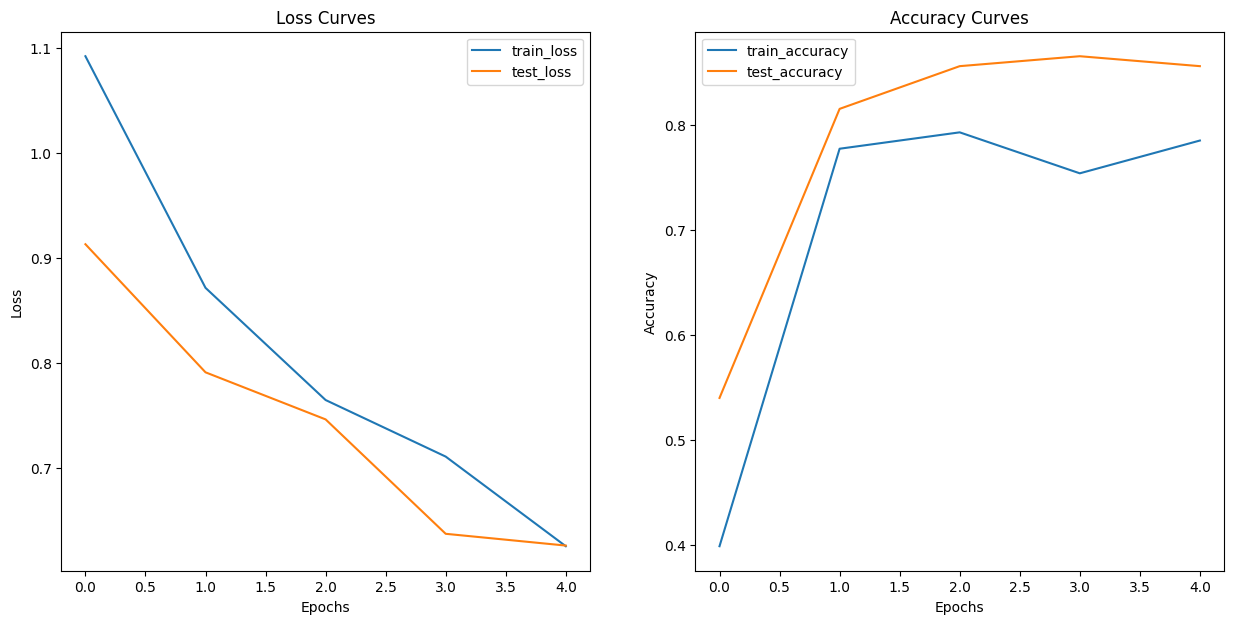

In [20]:
plot_loss_curve(results=results)

### Making Predictions
we will define a function called `pred_plot_img()` to make predicitons and plot the image along with predicted class
Inputs
1. model -> trained model
2. image_path
3. list of class_names
4. image_size,
5. transform
6. device

Steps:
-load the image
- create transform if not given
- model to target device
- turn on evaluation mode `.eval()`
- transform the target image: to add batch dim
- make preds
- preds logits -> preds probabs
- pred probabs -> pred labels
- plot using matplotlib

In [21]:
from PIL import Image

def pred_plot_img(model: torch.nn.Module,
                  image_path: str,
                  class_names: List[str],
                  image_size: Tuple[int,int] =(224,224),
                  transform: torchvision.transforms =None,
                  device: torch.device = device):
  # load the image
  img = Image.open(image_path)

  # transform
  if transform is not None:
    img_transform = transform

  else:
    img_transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean= [0.485,0.456,0.406],
                             std=[0.229,0.224,0.225])
    ])

  # to device
  model.to(device)

  # evaluation mode
  model.eval()
  with torch.inference_mode():
    # transform and add extra dim
    transformed_img = img_transform(img).unsqueeze(dim=0)

    # make preds
    target_img_pred = model(transformed_img.to(device))

  # logits -> probab
  target_img_pred_probs = torch.softmax(target_img_pred, dim=1)

  # probab -> preds labels
  target_img_pred_label = torch.argmax(target_img_pred_probs, dim=1)

  # plot the image and preds prob
  plt.figure()
  plt.imshow(img)
  title = f"Pred: {class_names[target_img_pred_label]} | Prob: {target_img_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)

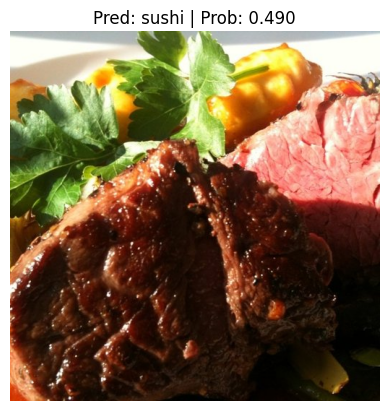

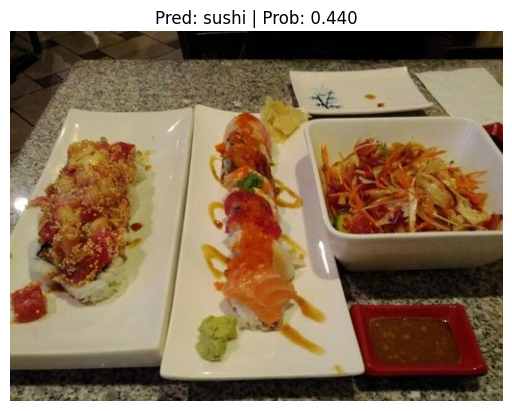

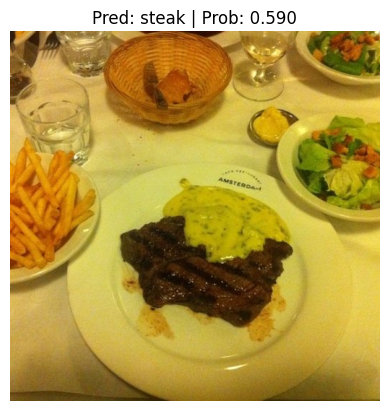

In [22]:
# let's make some predicitons on our test dataset
from pathlib import Path
import random

num_imgs = 3
test_img_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_img_path_sample = random.sample(population= test_img_path_list,
                                     k= num_imgs)
    # randomly selects k number of images from population
for image_path in test_img_path_sample:
  pred_plot_img(model=model,
                image_path=image_path,
                class_names=class_names,
                transform=weights.transforms(),
                image_size=(224,224))

### Prediction on custom image

In [23]:
# download custom image
import requests
from pathlib import Path

#setup path
data_path = Path('data/')
custom_image_path = data_path/'pizza-image.jpeg'

# download if not already exist
if not custom_image_path.is_file():
  with open(custom_image_path, 'wb') as f:
    request = requests.get("https://raw.githubusercontent.com/aashu-0/images/refs/heads/main/IMG_20230924_214608.jpg")
    print(f'Downloading {custom_image_path}...')
    f.write(request.content)
else:
  print(f'{custom_image_path} already exists')

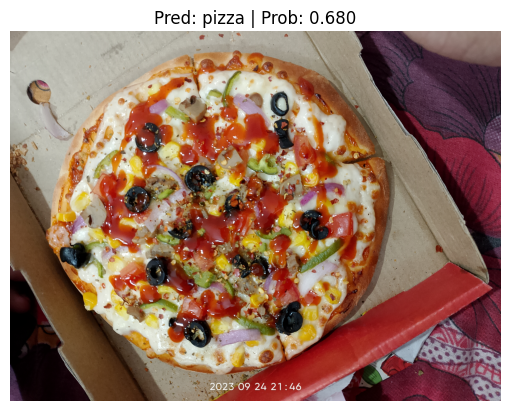

In [24]:
# make predict and plot the image
pred_plot_img(model=model,
              image_path=custom_image_path,
              class_names=class_names)

### 1. Making Prediciton on entire test data

In [25]:
from tqdm.auto import tqdm

# make preds
test_preds =[]
test_truth =[]
model.to(device)
#eval mode
model.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloaders):  # X is image tensor, y is label
    X, y = X.to(device), y.to(device)

    test_truth.append(y)
    # pass data through the model
    test_logits = model(X)
    # logits -> probs
    pred_probs = torch.softmax(test_logits, dim=1)
    # probs -> labels
    pred_labels = torch.argmax(pred_probs, dim=1)

    # append preds label to list
    test_preds.append(pred_labels)

# print truth labels and predicted labels
print(f"Truth labels(batch of 3): \n {test_truth}\n Predicted labels(batch of 3): \n{test_preds}")

  0%|          | 0/3 [00:00<?, ?it/s]

Truth labels(batch of 3): 
 [tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'), tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')]
 Predicted labels(batch of 3): 
[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 2, 1, 1, 1, 1], device='cuda:0'), tensor([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 2], device='cuda:0'), tensor([0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='cuda:0')]


In [26]:
# concatenate test preds and truth labels
test_preds= torch.cat(test_preds).cpu()
test_truth = torch.cat(test_truth).cpu()

test_preds, test_truth

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
         2, 2, 2]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2]))

### Plot Confusion Matrix
Let's plot confusion matrix using scikit learn and matplotlib

In [28]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf_mat = confusion_matrix(test_preds,
                            test_truth)
conf_mat

array([[21,  0,  1],
       [ 1, 16,  2],
       [ 3,  3, 28]])

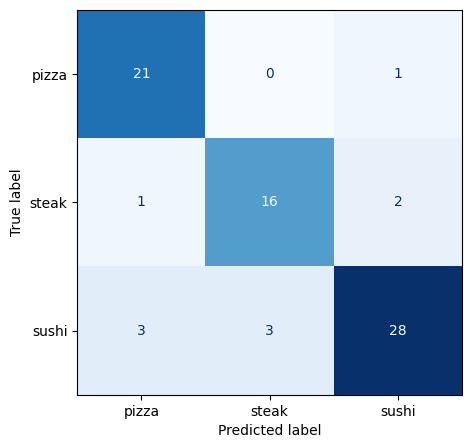

In [30]:
# plot the confusion matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                            display_labels=class_names)

fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(include_values=True, cmap="Blues",
                colorbar=False, values_format='.0f',ax=ax)

so in total we got in total (3+3+1+2+1+0) = 10 images wrong

### Get the 'most wrong' of the predictions on the test

create the dictionary with class name, label, prediction, prediction prob

In [43]:
from pathlib import Path
test_data_paths = list(Path(test_dir).glob('*/*.jpg'))
test_labels = [path.parent.stem for path in test_data_paths]


def pred_and_store(test_paths, model, transform, class_names, device):
  test_pred_list = []

  for path in tqdm(test_paths):
    pred_dict = {}

    # path
    pred_dict['image_path']= path

    #class name
    class_name = path.parent.stem
    pred_dict['class_name'] = class_name

    # pred and pred probs
    from PIL import Image
    img = Image.open(path)
    transform_img = transform(img).unsqueeze(0) # add batch dim

    model.eval()
    with torch.inference_mode():
      pred_logits = model(transform_img.to(device))
      pred_prob = torch.softmax(pred_logits, dim=1)
      pred_label  = torch.argmax(pred_prob, dim=1)
      pred_class = class_names[pred_label.cpu()]

      pred_dict['pred_prob'] = pred_prob.unsqueeze(0).max().cpu().item()
      pred_dict['pred_class'] = pred_class

    # check
    pred_dict['correct'] = class_name ==pred_class
    # print(pred_dict)

    # append dict
    test_pred_list.append(pred_dict)
  return test_pred_list

In [46]:
test_pred_dicts = pred_and_store(test_paths=test_data_paths,
                                 model = model,
                                 transform = manual_transforms,
                                 class_names=class_names,
                                 device= device)
test_pred_dicts[:5]

  0%|          | 0/75 [00:00<?, ?it/s]

[{'image_path': PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.8379720449447632,
  'pred_class': 'steak',
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi/test/steak/1627703.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.4863748848438263,
  'pred_class': 'steak',
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.8541753888130188,
  'pred_class': 'steak',
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.47745394706726074,
  'pred_class': 'steak',
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.8575499057769775,
  'pred_class': 'steak',
  'correct': True}]

In [50]:
# turn dict to dataframe
import pandas as pd
test_pred_df = pd.DataFrame(test_pred_dicts)

# sort
top_5_wrong_preds = test_pred_df.sort_values(by= ['correct','pred_prob'], ascending = [True, False])
top_5_wrong_preds.head()

,image_path,class_name,pred_prob,pred_class,correct
62,data/pizza_steak_sushi/test/sushi/684266.jpg,sushi,0.564728,steak,False
7,data/pizza_steak_sushi/test/steak/27415.jpg,steak,0.557890,sushi,False
22,data/pizza_steak_sushi/test/pizza/2871261.jpg,pizza,0.529656,steak,False
35,data/pizza_steak_sushi/test/pizza/2508636.jpg,pizza,0.523417,sushi,False
50,data/pizza_steak_sushi/test/sushi/2394442.jpg,sushi,0.421953,pizza,False
